# Spotify Analytics

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
original_df = pd.read_csv('data/universal_top_spotify_songs.csv')
df = original_df.copy()
display(df.head())

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-06-11,95,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,42UBPzRMh5yyz0EDPr6fr1,Manchild,Sabrina Carpenter,2,-1,48,NaN,2025-06-11,89,True,...,7,-5.087,1,0.0572,0.122000,0.000000,0.3170,0.811,123.010,4
2,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,3,0,1,NaN,2025-06-11,98,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
3,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",4,0,-1,NaN,2025-06-11,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
4,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,5,1,0,NaN,2025-06-11,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2110316 entries, 0 to 2110315
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      int6

In [4]:
df.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06,2.110316e+06
mean,2.549302e+01,9.230660e-01,2.932522e+00,7.590713e+01,1.943095e+05,6.759191e-01,6.488031e-01,5.526496e+00,-6.772439e+00,5.364571e-01,9.550408e-02,2.748491e-01,2.316185e-02,1.705588e-01,5.462535e-01,1.221008e+02,3.900368e+00
std,1.442900e+01,7.015535e+00,1.233129e+01,1.576302e+01,4.986054e+04,1.440469e-01,1.689142e-01,3.594979e+00,3.874849e+00,4.986692e-01,9.138830e-02,2.509297e-01,1.137297e-01,1.247528e-01,2.311527e-01,2.781938e+01,4.044448e-01
min,1.000000e+00,-4.900000e+01,-4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e-05,0.000000e+00,-5.434100e+01,0.000000e+00,0.000000e+00,3.450000e-06,0.000000e+00,1.390000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,-1.000000e+00,-3.000000e+00,6.500000e+01,1.626370e+05,5.800000e-01,5.520000e-01,2.000000e+00,-7.830000e+00,0.000000e+00,3.840000e-02,6.670000e-02,0.000000e+00,9.610000e-02,3.700000e-01,1.000190e+02,4.000000e+00
50%,2.500000e+01,0.000000e+00,0.000000e+00,7.900000e+01,1.861910e+05,7.000000e-01,6.680000e-01,6.000000e+00,-6.064000e+00,1.000000e+00,5.810000e-02,1.910000e-01,1.340000e-06,1.220000e-01,5.480000e-01,1.199650e+02,4.000000e+00
75%,3.800000e+01,2.000000e+00,5.000000e+00,8.800000e+01,2.187010e+05,7.800000e-01,7.670000e-01,9.000000e+00,-4.723000e+00,1.000000e+00,1.120000e-01,4.370000e-01,1.010000e-04,2.040000e-01,7.330000e-01,1.400210e+02,4.000000e+00
max,5.000000e+01,4.900000e+01,4.900000e+01,1.000000e+02,1.296000e+06,9.880000e-01,9.980000e-01,1.100000e+01,3.233000e+00,1.000000e+00,9.570000e-01,9.960000e-01,9.950000e-01,9.830000e-01,9.920000e-01,2.360890e+02,5.000000e+00


In [5]:
# Check for null values
df.isna().sum().sort_values(ascending=False)

country               28908
album_name              822
album_release_date      659
name                     30
artists                  29
key                       0
tempo                     0
valence                   0
liveness                  0
instrumentalness          0
acousticness              0
speechiness               0
mode                      0
loudness                  0
spotify_id                0
energy                    0
danceability              0
duration_ms               0
is_explicit               0
popularity                0
snapshot_date             0
weekly_movement           0
daily_movement            0
daily_rank                0
time_signature            0
dtype: int64

In [6]:
# Drop rows with null artists, name, album_release_date, and album_name
df = df.dropna(subset=['artists', 'name', 'album_release_date', 'album_name'])
df.isna().sum().sort_values(ascending=False)

country               28901
spotify_id                0
danceability              0
tempo                     0
valence                   0
liveness                  0
instrumentalness          0
acousticness              0
speechiness               0
mode                      0
loudness                  0
key                       0
energy                    0
album_release_date        0
name                      0
album_name                0
duration_ms               0
is_explicit               0
popularity                0
snapshot_date             0
weekly_movement           0
daily_movement            0
daily_rank                0
artists                   0
time_signature            0
dtype: int64

In [7]:
# Convert dates to datetime
df['album_release_date'] = pd.to_datetime(df['album_release_date'])
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

In [8]:
# Aggregate song information - raw info into summary
song_df = df.groupby('spotify_id').agg(
        # Meta
        name=('name','first'),
        artists=('artists','first'),
        is_explicit=('is_explicit', 'first'),
        album_release_date=('album_release_date', 'first'),

        # Audio
        popularity=('popularity', 'mean'),
        danceability=('danceability', 'mean'),
        energy=('energy', 'mean'),
        loudness=('loudness', 'mean'),
        valence=('valence', 'mean'),
        temp=('tempo', 'mean'),

        # Country
        num_countries=('country', pd.Series.nunique),
        # country_hit_count=('country', lambda x: x.notna().sum()),
        global_hit=('country', lambda x: x.isna().any()),

        # Daily Ranking
        avg_rank=('daily_rank', 'mean'),
        best_rank=('daily_rank', 'min'),
        worst_rank=('daily_rank', 'max'),

        # Weekly Movement
        avg_movement=('weekly_movement', 'mean'),
        max_movement=('weekly_movement', 'max'),
        min_movement=('weekly_movement', 'min'),
        positive_weeks=('weekly_movement', lambda x: (x > 0).sum()),
        negative_weeks=('weekly_movement', lambda x: (x < 0).sum())
    ).reset_index()
display(song_df.head())

,spotify_id,name,artists,is_explicit,album_release_date,popularity,danceability,energy,loudness,valence,...,num_countries,global_hit,avg_rank,best_rank,worst_rank,avg_movement,max_movement,min_movement,positive_weeks,negative_weeks
0,000n6Lx4yqUAslF1x3JeFY,béke,"Azahriah, DESH, Young Fly, Lord Panamo, Copy Con",False,2023-08-24,62.000000,0.676,0.728,-7.661,0.9380,...,1,False,26.205882,14,44,1.882353,36,-12,9,22
1,001TLpmtuQMWJYyE7q9ayM,All Eyez On Me,"Olexesh, Nimo",True,2023-11-02,33.000000,0.823,0.567,-9.571,0.5450,...,2,False,31.000000,23,39,19.000000,27,11,2,0
2,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,False,2004-01-01,87.015117,0.352,0.911,-5.230,0.2360,...,12,False,37.351474,8,50,1.416478,42,-22,671,535
3,005L1nFVHdbcd7gvtK7zrh,Obě Strany,Nik Tendo,True,2024-09-13,37.833333,0.854,0.453,-9.620,0.0818,...,2,False,30.166667,13,43,19.833333,37,7,6,0
4,005cocyIL36CVjjtUEdVSq,En Solskinnsdag,Postgirobygget,False,1996-01-01,57.160000,0.786,0.436,-9.802,0.7340,...,1,False,43.000000,22,50,5.040000,28,-16,16,3


In [9]:
# Derived Features:
song_df['num_artists'] = song_df['artists'].str.count(',') + 1
song_df['release_year'] = song_df['album_release_date'].dt.year
song_df['release_month'] = song_df['album_release_date'].dt.month
song_df['release_day'] = song_df['album_release_date'].dt.day
display(song_df.head())

,spotify_id,name,artists,is_explicit,album_release_date,popularity,danceability,energy,loudness,valence,...,worst_rank,avg_movement,max_movement,min_movement,positive_weeks,negative_weeks,num_artists,release_year,release_month,release_day
0,000n6Lx4yqUAslF1x3JeFY,béke,"Azahriah, DESH, Young Fly, Lord Panamo, Copy Con",False,2023-08-24,62.000000,0.676,0.728,-7.661,0.9380,...,44,1.882353,36,-12,9,22,5,2023,8,24
1,001TLpmtuQMWJYyE7q9ayM,All Eyez On Me,"Olexesh, Nimo",True,2023-11-02,33.000000,0.823,0.567,-9.571,0.5450,...,39,19.000000,27,11,2,0,2,2023,11,2
2,003vvx7Niy0yvhvHt4a68B,Mr. Brightside,The Killers,False,2004-01-01,87.015117,0.352,0.911,-5.230,0.2360,...,50,1.416478,42,-22,671,535,1,2004,1,1
3,005L1nFVHdbcd7gvtK7zrh,Obě Strany,Nik Tendo,True,2024-09-13,37.833333,0.854,0.453,-9.620,0.0818,...,43,19.833333,37,7,6,0,1,2024,9,13
4,005cocyIL36CVjjtUEdVSq,En Solskinnsdag,Postgirobygget,False,1996-01-01,57.160000,0.786,0.436,-9.802,0.7340,...,50,5.040000,28,-16,16,3,1,1996,1,1


In [10]:
print((song_df.isna().sum() > 0).sum())

0


In [11]:
columns_to_drop = ['spotify_id', 'album_release_date']
song_df.drop(columns=columns_to_drop, inplace=True)
display(song_df.head())

,name,artists,is_explicit,popularity,danceability,energy,loudness,valence,temp,num_countries,...,worst_rank,avg_movement,max_movement,min_movement,positive_weeks,negative_weeks,num_artists,release_year,release_month,release_day
0,béke,"Azahriah, DESH, Young Fly, Lord Panamo, Copy Con",False,62.000000,0.676,0.728,-7.661,0.9380,174.089,1,...,44,1.882353,36,-12,9,22,5,2023,8,24
1,All Eyez On Me,"Olexesh, Nimo",True,33.000000,0.823,0.567,-9.571,0.5450,136.006,2,...,39,19.000000,27,11,2,0,2,2023,11,2
2,Mr. Brightside,The Killers,False,87.015117,0.352,0.911,-5.230,0.2360,148.033,12,...,50,1.416478,42,-22,671,535,1,2004,1,1
3,Obě Strany,Nik Tendo,True,37.833333,0.854,0.453,-9.620,0.0818,137.930,2,...,43,19.833333,37,7,6,0,1,2024,9,13
4,En Solskinnsdag,Postgirobygget,False,57.160000,0.786,0.436,-9.802,0.7340,120.100,1,...,50,5.040000,28,-16,16,3,1,1996,1,1


In [12]:
song_df['is_explicit'] = song_df['is_explicit'].astype(int)
display(song_df)

,name,artists,is_explicit,popularity,danceability,energy,loudness,valence,temp,num_countries,...,worst_rank,avg_movement,max_movement,min_movement,positive_weeks,negative_weeks,num_artists,release_year,release_month,release_day
0,béke,"Azahriah, DESH, Young Fly, Lord Panamo, Copy Con",0,62.000000,0.676,0.728,-7.661,0.9380,174.089,1,...,44,1.882353,36,-12,9,22,5,2023,8,24
1,All Eyez On Me,"Olexesh, Nimo",1,33.000000,0.823,0.567,-9.571,0.5450,136.006,2,...,39,19.000000,27,11,2,0,2,2023,11,2
2,Mr. Brightside,The Killers,0,87.015117,0.352,0.911,-5.230,0.2360,148.033,12,...,50,1.416478,42,-22,671,535,1,2004,1,1
3,Obě Strany,Nik Tendo,1,37.833333,0.854,0.453,-9.620,0.0818,137.930,2,...,43,19.833333,37,7,6,0,1,2024,9,13
4,En Solskinnsdag,Postgirobygget,0,57.160000,0.786,0.436,-9.802,0.7340,120.100,1,...,50,5.040000,28,-16,16,3,1,1996,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24963,Hori Khele Raghuveera,"Amitabh Bachchan, Sukhwinder Singh, Alka Yagni...",0,55.500000,0.521,0.795,-8.119,0.5310,138.049,1,...,10,41.500000,43,40,2,0,4,2003,8,23
24964,Ku Ha Været Outroen,Noah Carter,1,34.500000,0.632,0.558,-6.827,0.3390,173.908,1,...,50,9.500000,23,0,3,0,1,2024,3,22
24965,Bailando,"Bajorson, Dawid Obserwator, Dj Killer, David T...",0,66.860465,0.786,0.837,-7.087,0.8700,140.040,1,...,43,4.720930,33,-14,29,13,4,2025,4,4
24966,"TÌNH ĐẦU QUÁ CHÉN (feat. Quang Hùng MasterD, N...","ANH TRAI ""SAY HI"", Quang Hùng MasterD, Negav, ...",0,58.964286,0.856,0.788,-5.105,0.7090,119.995,1,...,27,9.178571,26,-2,22,3,5,2024,9,16


In [13]:
print(song_df.columns)

Index(['name', 'artists', 'is_explicit', 'popularity', 'danceability',
       'energy', 'loudness', 'valence', 'temp', 'num_countries', 'global_hit',
       'avg_rank', 'best_rank', 'worst_rank', 'avg_movement', 'max_movement',
       'min_movement', 'positive_weeks', 'negative_weeks', 'num_artists',
       'release_year', 'release_month', 'release_day'],
      dtype='object')


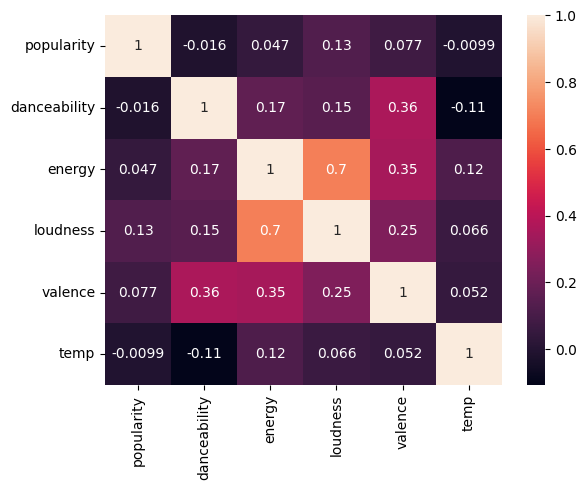

In [14]:
sns.heatmap(song_df[['popularity','danceability','energy','loudness','valence','temp']].corr(), annot=True)
plt.show()

In [15]:
# Encode month and day cyclically -> helps model distinguish December and January as consecutive instead of distant
song_df['release_month_sin'] = np.sin(2 * np.pi * song_df['release_month']/12)
song_df['release_month_cos'] = np.cos(2 * np.pi * song_df['release_month']/12)

song_df['release_day_sin'] = np.sin(2 * np.pi * song_df['release_day']/31) 
song_df['release_day_cos'] = np.cos(2 * np.pi * song_df['release_day']/31)

song_df = song_df.drop(columns=['release_month', 'release_day'])

In [16]:
# Split data into test and validation sets
X = song_df.drop(columns='global_hit')
y = song_df['global_hit']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=96, stratify=y)

In [17]:
# Normalize year using min max
scaler = MinMaxScaler()
X_train['release_year_norm'] = scaler.fit_transform(X_train[['release_year']])
X_val['release_year_norm'] = scaler.transform(X_val[['release_year']])

In [18]:
# Scale numeric features
numeric_features = X_train.select_dtypes(include=['number']).columns.tolist()
scaler = StandardScaler()
train_scaled = scaler.fit_transform(X_train[numeric_features])
val_scaled = scaler.transform(X_val[numeric_features])

train_scaled_df = pd.DataFrame(train_scaled, columns=numeric_features, index=X_train.index)
val_scaled_df = pd.DataFrame(val_scaled, columns=numeric_features, index=X_val.index)

X_train_scaled = pd.concat([train_scaled_df, X_train.drop(columns=numeric_features)], axis=1)
X_val_scaled = pd.concat([val_scaled_df, X_val.drop(columns=numeric_features)], axis=1)

In [19]:
# Combine energy and loudness to remove collinearity
pca = PCA(n_components=1)
tr_energy_loudness = pca.fit_transform(X_train[['energy', 'loudness']])
val_energy_loudness = pca.transform(X_val[['energy', 'loudness']])

X_train_scaled['energy_loudness'] = tr_energy_loudness
X_val_scaled['energy_loudness'] = val_energy_loudness

cols_to_drop = ['energy', 'loudness', 'name', 'artists']

X_train_scaled.drop(columns=cols_to_drop, inplace=True)
X_val_scaled.drop(columns=cols_to_drop, inplace=True)

## Model

In [20]:
rf = RandomForestClassifier(
    n_estimators=100,  
    random_state=42,
    max_depth=None,     
    n_jobs=-1           
)

rf.fit(X_train_scaled, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.9858515750133475
              precision    recall  f1-score   support

       False       0.99      1.00      0.99      3612
        True       0.86      0.72      0.79       134

    accuracy                           0.99      3746
   macro avg       0.92      0.86      0.89      3746
weighted avg       0.99      0.99      0.99      3746



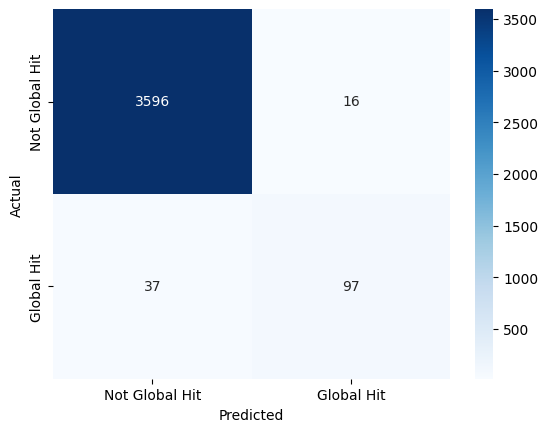

In [21]:
y_pred = rf.predict(X_val_scaled)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

labels = ['Not Global Hit', 'Global Hit']
matrix = confusion_matrix(y_val, y_pred)


sns.heatmap(matrix, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

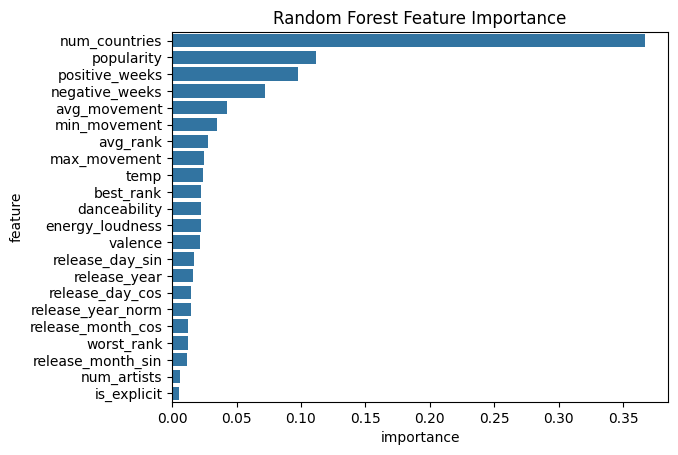

In [22]:
feature_importances = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=False)

sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title("Random Forest Feature Importance")
plt.show()

## Analysis

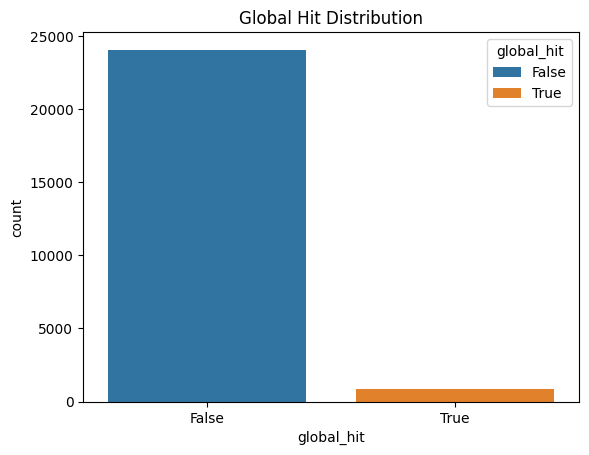

In [23]:
# Global Hit Distribution
sns.countplot(x='global_hit', hue='global_hit', data=song_df)
plt.title('Global Hit Distribution')
plt.show()

Text(0.5, 1.0, 'Explicit vs. Non-Explicit Songs (Global vs. Local)')

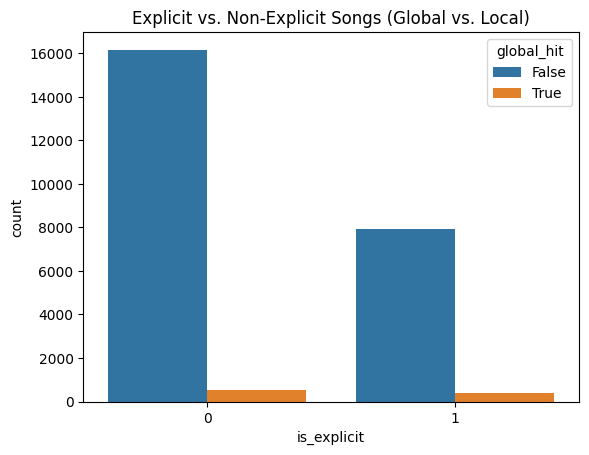

In [24]:
# Explicit Content
sns.countplot(x='is_explicit', hue='global_hit', data=song_df)
plt.title("Explicit vs. Non-Explicit Songs (Global vs. Local)")

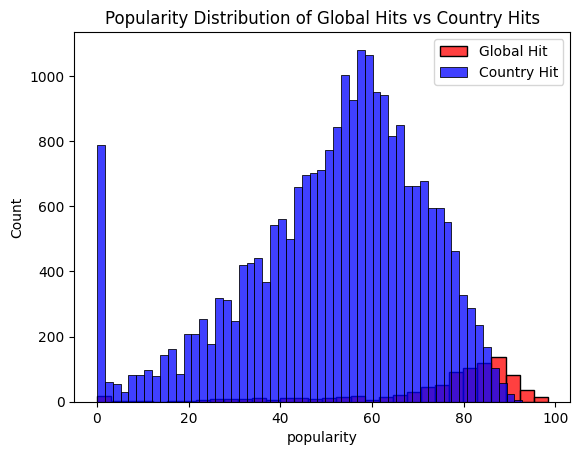

In [25]:
sns.histplot(song_df[song_df['global_hit'] == 1]['popularity'], color='red', label='Global Hit')
sns.histplot(song_df[song_df['global_hit'] == 0]['popularity'], color='blue', label='Country Hit')
plt.title('Popularity Distribution of Global Hits vs Country Hits')
plt.legend()
plt.show()

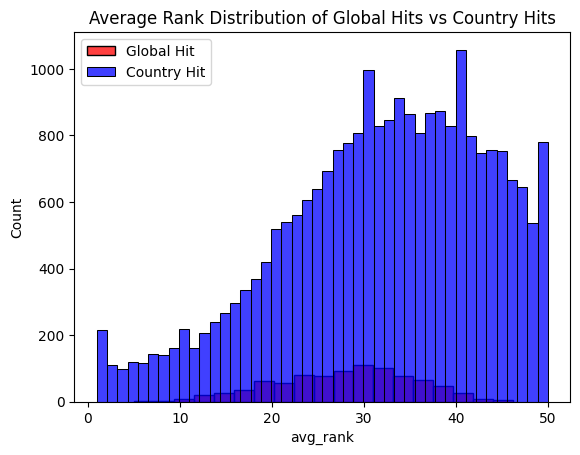

In [26]:
sns.histplot(song_df[song_df['global_hit'] == 1]['avg_rank'], color='red', label='Global Hit')
sns.histplot(song_df[song_df['global_hit'] == 0]['avg_rank'], color='blue', label='Country Hit')
plt.title('Average Rank Distribution of Global Hits vs Country Hits')
plt.legend()
plt.show()

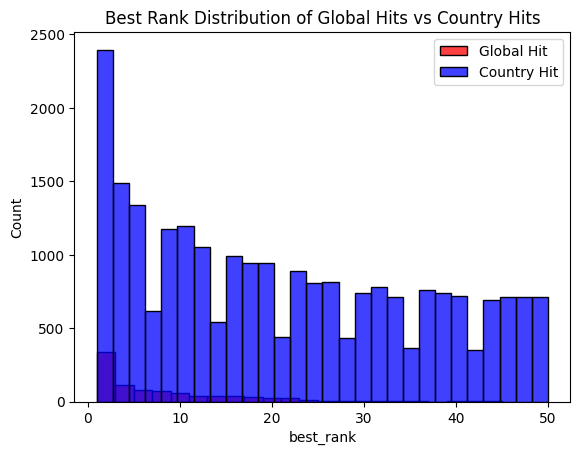

In [27]:
sns.histplot(song_df[song_df['global_hit'] == 1]['best_rank'], color='red', label='Global Hit')
sns.histplot(song_df[song_df['global_hit'] == 0]['best_rank'], color='blue', label='Country Hit')
plt.title('Best Rank Distribution of Global Hits vs Country Hits')
plt.legend()
plt.show()

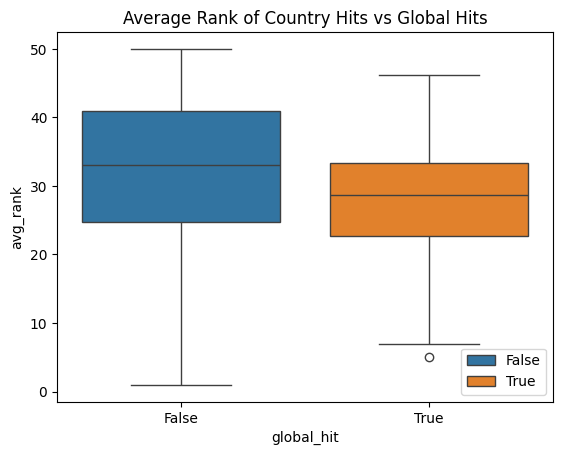

In [28]:
sns.boxplot(x='global_hit', y='avg_rank', hue='global_hit', data=song_df)
plt.title('Average Rank of Country Hits vs Global Hits')
plt.legend()
plt.show()